## 1) Bereitstellen der Daten
     1.1) download der openbeer Datenbank von: https://openbeerdb.com/, "openbeerdb_csv.zip" (Man darf sich den Link vorher zusammenbauen. Die Idee ist jedoch, dass nach dem publizieren eines Notebooks/Code dieser Standalone ist und man keine weiteren Interkationen vom benutzer benötigt)
     1.2) unzip und einlesen der csv in python

In [ ]:
openbeercsvURL = 'https://openbeerdb.com/files/openbeerdb_csv.zip'

from datetime import datetime
def getFilePath():
    #create prefix for files
    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime("%Y%m%d_%H%M%S")
    #create file name
    filepath ='c:/temp/openBeer/{}_openbeerdb_csv'.format(timestampStr)
    return filepath




In [ ]:
#download with requests...
import requests
print('starting download with requests')
myfile = requests.get(openbeercsvURL)
print('finished download with requests')
print('starting writing file')
open(getFilePath()+".zip", 'wb').write(myfile.content)
print('finished writing file')

# Retrieve HTTP meta-data
print(myfile.status_code)
print(myfile.headers['content-type'])
print(myfile.encoding)


In [ ]:
#with native library
import urllib.request

print('Beginning file download with urllib...')

url = openbeercsvURL
#urllib.request.urlretrieve(url, getFilePath()) gives 403 error???

# unzip and read data

In [25]:
import zipfile
timestamp= "20200430_122304"
path_to_zip_file ="c:/temp/openBeer/{}_openbeerdb_csv.zip".format(timestamp)
directory_to_extract_to ="c:/temp/openBeer/extracted{}".format(timestamp)
print("start extracting")
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
    
print("finished extracting")

start extracting
finished extracting


In [26]:
#reading the data...
extractedFolderpath = "C:/temp/openbeer/extracted{}/openbeerdb_csv/".format("20200430_122304")
extractedFolderpath

'C:/temp/openbeer/extracted20200430_122304/openbeerdb_csv/'

In [4]:
#this doesnt work without some cleaning of the data
import csv
filenameStyles ="styles.csv"
def printSummary(filename):    
    stylesPath = extractedFolderpath+filename
    with open(stylesPath) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'{filename} has Column name {", ".join(row)}')
                line_count += 1
            else:
                line_count += 1
        print(f'Processed {line_count} lines.')



In [27]:
#find all files
import os
fileArray = next(os.walk(extractedFolderpath))[2]

In [28]:
#for file in fileArray:
#    if("csv" == file[-3:] and
#      "beers.csv"!= file):  #beers has some strange format todo look at that
#       printSummary(file)

In [29]:
#installations
#pip install pandas
#%conda create --name ipyreport -c conda-forge jupyter pandoc==2.6
#%source activate ipyreport

In [30]:
#%conda install -c conda-forge ipypublish

## 2 A) Einlesen der Daten in eine Klasse die Datenverarbeitung auf python ermöglicht
     2 A.1) Welches Paket ist gut geeignet und warum?
     2 A.2) Einlesen der Daten in dieses Paket.
     2 A.3) Erstellen einer "Qualitativen Zusammenfassung" zu den Daten.

Pandas ist dafür gedacht daten als Dataframe zu bearbeiten und wieder in csv zu liefern


In [31]:
#imports 
from ipypublish import nb_setup
import pandas as pd
import numpy as np
import os
pd = nb_setup.setup_pandas(escape_latex=False)

In [32]:
beerColumns =["id","brewery_id","name","cat_id","style_id","abv","ibu","srm","upc","filepath","descript","last_mod"]

filename ="beers.csv"
print("reading file:{}".format(filename))
df = pd.read_csv(extractedFolderpath+filename)[beerColumns]
desc =df.describe()
desc
print(desc)   


reading file:beers.csv
          id brewery_id      name  cat_id  style_id     abv   ibu   srm   upc  \
count   5845       5837      5837    5832      5829  5825.0  5822  5822  5822   
unique  5845       1650      4982      28       129   266.0    20    15     5   
top     3303       1072  Pale Ale       3        -1     0.0     0     0     0   
freq       1         47        48    1248      1046  2648.0  4803  4809  4816   

                       filepath  \
count                        25   
unique                       25   
top     IMG_20110808_205330.jpg   
freq                          1   

                                                 descript             last_mod  
count                                                1972                 5818  
unique                                               1966                  214  
top     A series of single hop, small batch IPAs brewe...  2010-07-22 20:00:20  
freq                                                    3              

C:\Users\rbo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,46,48,49,50,51,52,54,58,60,61,62,63,64,66,70,71,72,73,74,75,76,78,82,84,85,86,87,88,90,94,96,97,98,99,100,102,108,109,110,111,112,114,118,119,121,122,123,124,126,131,133,134,135,136,138,143,145,146,147,148,150,155,157,158,159,160,162,167,169,170,171,172,174,179,181,182,183,184,186,191,193,194,195,196,198,203,205,206,207,215,217,219,227,229,231,239,240,241,242,243,245,247,251,253,255,257,263,264,266,268,276,278,280,288,290,292,300,302,304,312,314,316,324,326,328,336,338,340,348,349,350,351,353,355,363,364,366,368,376,378,380,388,390,392,400,402,404,412,414,416,424,426,428,436,438,440,448,450,452,460,462,464,474,476,484,486,488,496,498,500,508,510,512,520,522,524,532,534,536,544) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compile

In [33]:
def readandprint(filename):
    print("reading file:{}".format(filename))
    df = pd.read_csv(extractedFolderpath+filename)
    desc =df.describe()
    desc
    print(desc)
    
#find all files

fileArray = next(os.walk(extractedFolderpath))[2]
    
fileArray.remove("beers.csv")

for file in fileArray:
    readandprint(file)

reading file:breweries.csv
                id
count  1414.000000
mean    713.725601
std     410.477463
min       1.000000
25%     359.250000
50%     715.500000
75%    1068.750000
max    1423.000000
reading file:breweries_geocode.csv
                id   brewery_id     latitude    longitude
count  1304.000000  1304.000000  1304.000000  1304.000000
mean    657.648006   699.611196    41.473073   -63.765908
std     379.382053   400.565205    12.959051    58.324611
min       1.000000     1.000000   -45.872000  -157.858000
25%     328.750000   353.500000    38.973475  -105.139500
50%     658.500000   703.500000    42.504450   -83.819250
75%     985.250000  1046.250000    48.149975    -1.260825
max    1315.000000  1394.000000    64.958300   176.854000
reading file:categories.csv
              id
count  11.000000
mean    6.000000
std     3.316625
min     1.000000
25%     3.500000
50%     6.000000
75%     8.500000
max    11.000000
reading file:styles.csv
               id      cat_id
count  141

## 2 B) Einlesen der Daten in eine lokalen Datenbank
     2 B.1) Welche Datenbank ist gut geeignet und warum?
     2 B.2) Einlesen der Daten in diese Datenbank.
     2 B.3) Erstellen einer "Qualitativen Zusammenfassung" zu den Daten.
     
  sql weil in tabellen format (nicht hierarchisch)
  sqlite while es gut verbunden ist mit Python. Die Daten sind nicht zu gross für sql3lite


In [34]:
import sqlite3
conn = sqlite3.connect('openbeerexample.db')

In [35]:
#put the beers csv into the database (only specific columns)
filename = "beers.csv"
print("reading file:{}".format(filename))
df = pd.read_csv(extractedFolderpath+filename)[beerColumns]
df.to_sql("beers", conn, if_exists="replace")
conn.close()

reading file:beers.csv


C:\Users\rbo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,46,48,49,50,51,52,54,58,60,61,62,63,64,66,70,71,72,73,74,75,76,78,82,84,85,86,87,88,90,94,96,97,98,99,100,102,108,109,110,111,112,114,118,119,121,122,123,124,126,131,133,134,135,136,138,143,145,146,147,148,150,155,157,158,159,160,162,167,169,170,171,172,174,179,181,182,183,184,186,191,193,194,195,196,198,203,205,206,207,215,217,219,227,229,231,239,240,241,242,243,245,247,251,253,255,257,263,264,266,268,276,278,280,288,290,292,300,302,304,312,314,316,324,326,328,336,338,340,348,349,350,351,353,355,363,364,366,368,376,378,380,388,390,392,400,402,404,412,414,416,424,426,428,436,438,440,448,450,452,460,462,464,474,476,484,486,488,496,498,500,508,510,512,520,522,524,532,534,536,544) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compile

In [36]:
#read the bear table 
conn = sqlite3.connect('openbeerexample.db')
dfsql = pd.read_sql_query("SELECT * from beers", conn)
dfsql.head()

,index,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,filepath,descript,last_mod
0,0,1,812,Hocus Pocus,11,116,4.5,0,0,0,None,Our take on a classic summer ale. A toast to ...,2010-07-22 20:00:20
1,1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0,None,None,2010-07-22 20:00:20
2,2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0,None,None,2010-07-22 20:00:20
3,3,4,287,Lucifer,-1,-1,8.5,0,0,0,None,None,2010-07-22 20:00:20
4,4,5,1056,Bitter,-1,-1,4.0,0,0,0,None,None,2010-07-22 20:00:20


In [37]:
dfsql.describe()
conn.close()

In [38]:
def getTableName(filename):
    return filename[0:len(filename)-4]

def importintodatabase(connection, filename):
    print("start writing to sql file:{}".format(filename))
    df = pd.read_csv(extractedFolderpath+filename)
    df.to_sql(getTableName(filename), conn, if_exists="replace")
    print("finished writing to sql file:{}".format(filename))   


In [39]:
#import into the database
fileArray = next(os.walk(extractedFolderpath))[2]
    
fileArray.remove("beers.csv")

conn = sqlite3.connect('openbeerexample.db')

for file in fileArray:
    importintodatabase(conn, file)

conn.close()

start writing to sql file:breweries.csv
finished writing to sql file:breweries.csv
start writing to sql file:breweries_geocode.csv
finished writing to sql file:breweries_geocode.csv
start writing to sql file:categories.csv
finished writing to sql file:categories.csv
start writing to sql file:styles.csv
finished writing to sql file:styles.csv


In [40]:
def readHeadFromDb(conn, file):
    selectAllQuery="SELECT * from {}".format(getTableName(file))
    dfsql = pd.read_sql_query(selectAllQuery, conn)
    return dfsql

In [41]:
fileArray = next(os.walk(extractedFolderpath))[2]
conn = sqlite3.connect('openbeerexample.db')
#use list comprehension to read all the tables
dataframes = [readHeadFromDb(conn,x) for x in fileArray]
conn.close()
#beers
#breweries
#breweries_geocode
#categories
#styles

    

In [42]:
dataframes[0].describe(include='all')

,index,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,filepath,descript,last_mod
count,5861.000000,5845,5837,5837,5832,5829,5825,5822,5822,5822,25,1972,5818
unique,NaN,5845,1335,4982,28,128,192,20,15,5,25,1966,214
top,NaN,3303,858,Pale Ale,3,-1,0.0,0,0,0,IMG_20110808_205330.jpg,"A series of single hop, small batch IPAs brewe...",2010-07-22 20:00:20
freq,NaN,1,57,48,1326,1208,2648,3047,3047,3047,1,3,5569
mean,2930.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1692.069295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1465.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2930.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4395.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
dataframes[1].describe(include='all')

,index,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
count,1414.000000,1414.000000,1414,1145,4,1392,1232,779,1413,1099,481,15,239,1414
unique,NaN,NaN,1412,1137,4,987,167,653,63,1095,474,15,222,30
top,NaN,NaN,Oakshire,5 Bartlett Bay Road,Stanhope St,Portland,California,0,United States,(812)325-93-25,http://www.anthonymartin.be/,mwLogo1.png,(No longer brewing),2010-07-22 20:00:20
freq,NaN,NaN,2,2,1,17,127,40,876,2,2,1,17,1385
mean,706.500000,713.725601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,408.330952,410.477463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,353.250000,359.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,706.500000,715.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1059.750000,1068.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dataframes[2].describe(include='all')

,index,id,brewery_id,latitude,longitude,accuracy
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,ROOFTOP
freq,NaN,NaN,NaN,NaN,NaN,505
mean,651.500000,657.648006,699.611196,41.473073,-63.765908,NaN
std,376.576685,379.382053,400.565205,12.959051,58.324611,NaN
min,0.000000,1.000000,1.000000,-45.872000,-157.858000,NaN
25%,325.750000,328.750000,353.500000,38.973475,-105.139500,NaN
50%,651.500000,658.500000,703.500000,42.504450,-83.819250,NaN
75%,977.250000,985.250000,1046.250000,48.149975,-1.260825,NaN


In [45]:
dataframes[3].describe(include='all')

,index,id,cat_name,last_mod
count,11.000000,11.000000,11,11
unique,NaN,NaN,11,2
top,NaN,NaN,International Ale,2010-06-08 00:00:00
freq,NaN,NaN,1,10
mean,5.000000,6.000000,NaN,NaN
std,3.316625,3.316625,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,2.500000,3.500000,NaN,NaN
50%,5.000000,6.000000,NaN,NaN
75%,7.500000,8.500000,NaN,NaN


In [46]:
dataframes[4].describe(include='all')

,index,id,cat_id,style_name,last_mod
count,141.000000,141.000000,141.000000,141,141
unique,NaN,NaN,NaN,139,141
top,NaN,NaN,NaN,Porter,2010-06-15 19:39:29
freq,NaN,NaN,NaN,2,1
mean,70.000000,71.000000,5.900709,NaN,NaN
std,40.847277,40.847277,3.505720,NaN,NaN
min,0.000000,1.000000,1.000000,NaN,NaN
25%,35.000000,36.000000,3.000000,NaN,NaN
50%,70.000000,71.000000,5.000000,NaN,NaN
75%,105.000000,106.000000,9.000000,NaN,NaN


## 3) Fragen auf den Daten (ihr dürft die Lösung auch mittels der Visualisierung aus Aufgabe 4 stützen)
     3.1) Was ist der durschnittliche Alkoholgehalt der produzierten Biere nach Produktionsland?
     3.2) Wie viele Brauereien gibt es pro Kontinent/Land/Stadt? Gibt es etwas auffälliges?
     3.3) Wieviele Bierstile braut eine Braurei im Durchschnitt? Wieviele sind es pro Land?
     3.4) Was ist der Median des Alkoholgehalts?
     3.5) Welcher Bierstil ist hauptsächlich in welchem Land zu finden?

In [47]:
#clean the abv column
beerdf =dataframes[0]

def cleanStuff():
    cnt=0
    for row in beerdf["abv"]:
        try:
            float(row)
        except ValueError:
            beerdf.loc[cnt,"abv"]=np.nan
        except TypeError:
            beerdf.loc[cnt,"abv"]=np.nan
        cnt+=1
beerdf.isnull().sum()
cleanStuff()
print(beerdf.isnull().sum())
beerdf['abv'] = beerdf['abv'].astype('float')
#write back to data
conn = sqlite3.connect('openbeerexample.db')
beerdf.to_sql("beers", conn, if_exists="replace")
conn.close()


index            0
id              16
brewery_id      24
name            24
cat_id          29
style_id        32
abv             40
ibu             39
srm             39
upc             39
filepath      5836
descript      3889
last_mod        43
dtype: int64


In [49]:
#using sql statement
conn = sqlite3.connect('openbeerexample.db')
selectAllQuery="SELECT Distinct breweries.country, beers.abv from beers left join breweries on beers.brewery_id = breweries.id"
dfsql = pd.read_sql_query(selectAllQuery, conn)
dfsql['abv'] = dfsql['abv'].astype('float')
dfsql.groupby(by=['country']).mean().sort_values(by='abv',ascending=False)


,abv
country,
United Kingdom,8.969348
Sri Lanka,8.400000
Estonia,7.800000
United States,7.717469
Belgium,7.457917
Germany,7.183784
Denmark,7.066667
Poland,6.885714
Argentina,6.666667


In [50]:
def cleanBeersBreweryReferences(beerdf):
    cnt=0
    columnName= "brewery_id" 
    for row in beerdf[columnName]:
        try:
            int(row)
        except ValueError:
            beerdf.loc[cnt,columnName]=-1
        except TypeError:
            beerdf.loc[cnt,columnName]=-1
        cnt+=1
    beerdf[columnName] = beerdf[columnName].astype("int64")



In [51]:
beerdf =dataframes[0] 
cleanBeersBreweryReferences(beerdf)
beerdf


,index,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,filepath,descript,last_mod
0,0,1,812,Hocus Pocus,11,116,4.5,0,0,0,None,Our take on a classic summer ale. A toast to ...,2010-07-22 20:00:20
1,1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0,None,None,2010-07-22 20:00:20
2,2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0,None,None,2010-07-22 20:00:20
3,3,4,287,Lucifer,-1,-1,8.5,0,0,0,None,None,2010-07-22 20:00:20
4,4,5,1056,Bitter,-1,-1,4.0,0,0,0,None,None,2010-07-22 20:00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,5856,5910,10,Honey Rye Ale,11.0,128.0,0.0,0.0,0.0,0.0,None,This beer is not very bitter which allows the ...,2011-08-15 11:54:55
5857,5857,5911,10,Strawberry,11.0,121.0,0.0,0.0,0.0,0.0,None,Strawberry Harvest Lager is a wheat beer made ...,2011-08-15 11:55:43
5858,5858,5912,10,Satsuma Wit,11.0,121.0,0.0,0.0,0.0,0.0,None,This Wit beer has a sweet and subtle citrus fl...,2011-08-15 11:56:18
5859,5859,5913,1422,Abhi beer,7.0,89.0,0.0,0.0,0.0,0.0,None,None,2011-09-27 00:36:14


In [52]:
#write back to data
conn = sqlite3.connect('openbeerexample.db')
beerdf.to_sql("beers", conn, if_exists="replace")
conn.close()

In [53]:
#using pandas
breweries =dataframes[1]

beers= dataframes[0]
breweries.dtypes
beers.dtypes
print(dataframes[0].memory_usage(deep=True))


Index             128
index           46888
id             357944
brewery_id      46888
name           437160
cat_id         355751
style_id       348737
abv             46888
ibu            356375
srm            356369
upc            356518
filepath       142033
descript      1226732
last_mod       453658
dtype: int64


In [69]:
beerBreweries =beers.join(breweries.set_index("id"),on="brewery_id",lsuffix='_beers', rsuffix='_brew')

#check if merge is correct: beerBreweries.isnull().sum()
beerBreweries.groupby(by=['country']).mean().sort_values(by='abv',ascending=False)

,level_0,index_beers,brewery_id,abv,index_brew
country,,,,,
Sri Lanka,3796.000000,3796.000000,791.000000,8.400000,785.000000
Estonia,2236.000000,2236.000000,1094.000000,7.800000,1088.000000
Denmark,2629.333333,2629.333333,510.333333,7.066667,505.166667
Argentina,395.250000,395.250000,363.000000,6.500000,358.000000
Poland,1172.000000,1172.000000,384.444444,6.133333,380.444444
Latvia,3573.000000,3573.000000,19.000000,5.733333,18.000000
Lithuania,1487.000000,1487.000000,999.750000,5.700000,995.000000
Hungary,3633.500000,3633.500000,432.500000,5.575000,427.750000
Belgium,2059.291411,2059.291411,314.423313,5.490429,310.546012


# brewery countries
mainly in USA. many countries only have one brewery

In [55]:
breweries.groupby("country").count().sort_values(by="id", ascending=False)

,index,id,name,address1,address2,city,state,code,phone,website,filepath,descript,last_mod
country,,,,,,,,,,,,,
United States,876,876,876,681,1,875,874,690,670,356,10,196,876
Germany,117,117,117,108,0,116,111,10,102,19,0,7,117
Belgium,99,99,99,91,0,98,87,9,84,22,0,9,99
United Kingdom,79,79,79,65,1,76,74,5,62,11,1,2,79
Canada,45,45,45,42,1,45,45,35,37,10,1,5,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,1,1,1,1,0,1,0,0,1,0,0,0,1
Kenya,1,1,1,1,0,1,0,0,1,0,0,0,1
Aruba,1,1,1,0,0,0,0,0,1,1,0,0,1


In [57]:
#chech the brewery column if there are null values
#breweries.isnull().sum()

In [58]:
#city
breweries.groupby("city").count().sort_values(by="id", ascending=False)

,index,id,name,address1,address2,state,code,country,phone,website,filepath,descript,last_mod
city,,,,,,,,,,,,,
Portland,17,17,17,14,0,17,13,17,12,6,0,4,17
Denver,13,13,13,10,0,13,11,13,11,4,0,2,13
Seattle,13,13,13,12,0,13,12,13,12,5,0,2,13
Chicago,10,10,10,9,0,10,8,10,6,3,0,1,10
San Francisco,10,10,10,8,0,10,8,10,7,3,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hoogstraten-Meer,1,1,1,1,0,1,0,1,1,0,0,0,1
Hook Norton,1,1,1,1,0,1,0,1,1,0,0,0,1
Hopland,1,1,1,1,0,1,1,1,1,0,0,0,1


In [59]:
#state
breweries.groupby("state").count().sort_values(by="id", ascending=False)

,index,id,name,address1,address2,city,code,country,phone,website,filepath,descript,last_mod
state,,,,,,,,,,,,,
California,127,127,127,95,0,127,93,127,93,41,0,13,127
Wisconsin,81,81,81,54,0,81,57,81,56,19,0,11,81
Colorado,60,60,60,47,0,60,47,60,46,20,0,10,60
Pennsylvania,53,53,53,50,0,53,49,53,47,46,0,25,53
Bayern,45,45,45,43,0,45,0,45,43,3,0,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,1,1,1,1,0,1,1,1,1,1,0,0,1
NSW,1,1,1,1,0,1,1,1,1,0,0,0,1
NJ,1,1,1,1,0,1,1,1,0,1,1,1,1


## styles pro brewery and country
Wieviele Bierstile braut eine Braurei im Durchschnitt? Wieviele sind es pro Land?

In [60]:
#make a fresh load from the database
fileArray = next(os.walk(extractedFolderpath))[2]
conn = sqlite3.connect('openbeerexample.db')
#use list comprehension to read all the tables
dataframes = [readHeadFromDb(conn,x) for x in fileArray]

beers = dataframes[0]
breweries =dataframes[1]

In [61]:
beers
#print(beers.dtypes)
#print(breweries.dtypes)
beerBreweries = beers.join(breweries, on="brewery_id", lsuffix='_beers', rsuffix='_brew', sort=True)
#beerBreweries.dtypes

In [62]:
#the average number of styles per brewery
beerBreweries.groupby("brewery_id").count()["cat_id"].mean()

4.408163265306122

In [63]:
#the average number of styles per country
beerBreweries.groupby("country").count().mean()["cat_id"]

93.69354838709677


     
## 4) Visualisierung der Daten
     4.1) Welche Pakete gibt es hier und was sind die Unterschiede?
     4.2) Was ist ein gutes Datendesiugn für die Visualisierung, und warum?
     
     4.1) Matplotlib and plotly
     4.2)

In [84]:
#with matplotlib
import matplotlib.pyplot as plt
import numpy as np

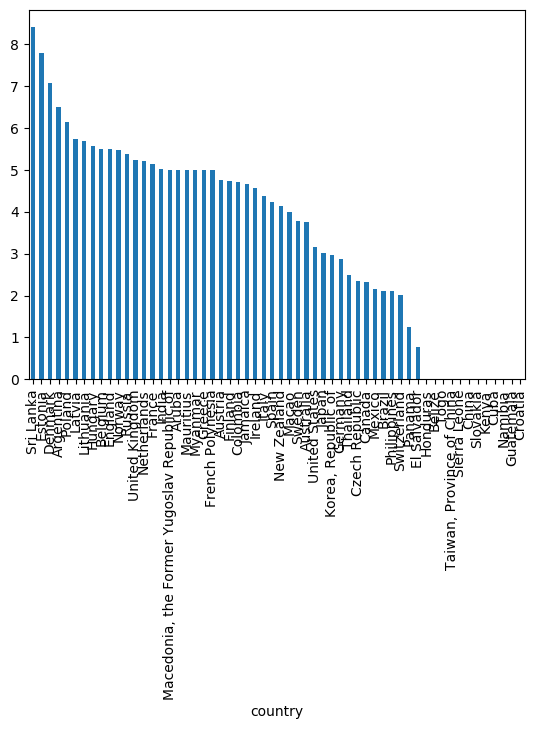

In [83]:

# data
countriesWithABV = beerBreweries.groupby(by=['country']).mean().sort_values(by='abv',ascending=False)

y_pos = np.arange(len(countriesWithABV))
performance = countriesWithABV["abv"]
#error = np.random.rand(len(countries))

performance.plot(kind='bar');